The dataset consists of 72,325 RGB images of 105 fruits and vegetables, divided into 54,072 images for training and 18,150 images for testing. Each folder holds images of the same fruit, while each image has only one item.

Objectives :
The summary of the neural network used using model summary.
The accuracy measure for the testing data.
A printed confusion matrix for testing data predictions

In [ ]:
import pandas as pd
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense, Dropout)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("moltean/fruits")

print("Path to dataset files:", path)

In [ ]:
path

In [ ]:
import os

# See contents of downloaded folder
print(os.listdir(path))

['fruits-360_100x100', 'fruits-360_3-body-problem', 'fruits-360_dataset_meta', 'fruits-360_multi', 'fruits-360_original-size']


In [ ]:
train_path = os.path.join(path, 'fruits-360', 'Training')
test_path = os.path.join(path, 'fruits-360', 'Test')

In [47]:
# Image parameters
img_height, img_width = 100, 100
batch_size = 32

In [48]:
# Data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

In [49]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 72871 images belonging to 206 classes.
Found 31122 images belonging to 206 classes.


In [50]:
# Get number of classes
num_classes = train_generator.num_classes
print("Number of classes:", num_classes)

Number of classes: 206


In [ ]:
# Build CNN model
model = Sequential([
    Conv2D(16, (2, 2), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, (2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (2, 2), activation='relu'),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Dropout(0.3),
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

In [53]:
# Compile
model.compile(
    optimizer=RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

In [56]:
# Evaluate
val_generator.reset()
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

973/973 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step


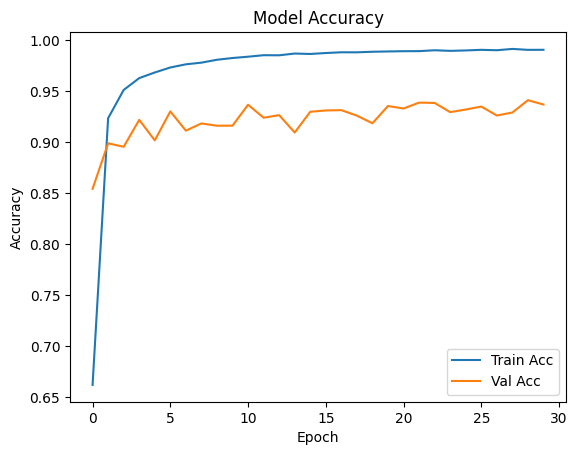

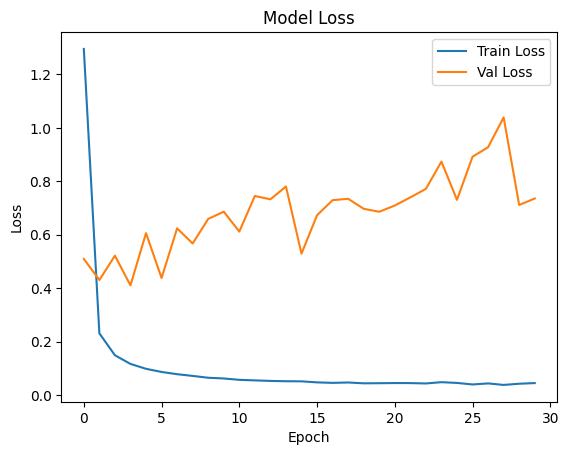

In [57]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [60]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

Confusion Matrix:
[[209   0   0 ...   0   0   0]
 [  0 129   0 ...   0   0   0]
 [  0   0 107 ...   0   0   0]
 ...
 [  0   0   0 ... 142   0   0]
 [  0   0   0 ...   0  72   0]
 [  0   0   0 ...   0   0  72]]

Classification Report:
                           precision    recall  f1-score   support

                 Apple 10       0.83      1.00      0.90       209
                 Apple 11       1.00      1.00      1.00       129
                 Apple 12       1.00      0.77      0.87       139
                 Apple 13       1.00      1.00      1.00       209
                 Apple 14       1.00      0.83      0.91       139
                 Apple 17       1.00      0.31      0.47       183
                 Apple 18       0.67      1.00      0.80       145
                 Apple 19       1.00      1.00      1.00       218
                  Apple 5       1.00      1.00      1.00       132
                  Apple 6       0.83      0.80      0.82       141
                  Apple 7   